<a href="https://colab.research.google.com/github/farieu/data-analysis/blob/AnaliseExploratoria2/eda_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória Adicional Good Reads

## Visuzalizações Adicionais do Dataset.


---


Boxplot, Dispersão, Histogramas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/BackEnd/GoodReads_cleanedwoImput.csv') # Dataset sem Imputação
#df = df[df['genre'] != "Unknown"]

In [ ]:
df.shape

(84054, 9)

Por conta do tamanho do dataset, foi aplicado uma versão reduzida (40% de amostragem para análise inicial) para que fosse possível efetuar a análise exploratória.

In [ ]:
# Selecionar uma amostra de 40% do dataset, com o parâmetro de random state para que seja reprodutível e não mude a cada execução da cédula.
amostradf = df.sample(frac=0.4, random_state=30)

A amostra de 40% é a mesma da primeira análise exploratória, pois o parâmetro permite que seja reprodutível.

O código abaixo gera o gráfico **igual** a [primeira análise](https://colab.research.google.com/drive/1XC71jNSv2WPO62Ss-OfsHXCezKNjYsI3?authuser=1#scrollTo=F1mp8rM9qcVp&line=4&uniqifier=1).

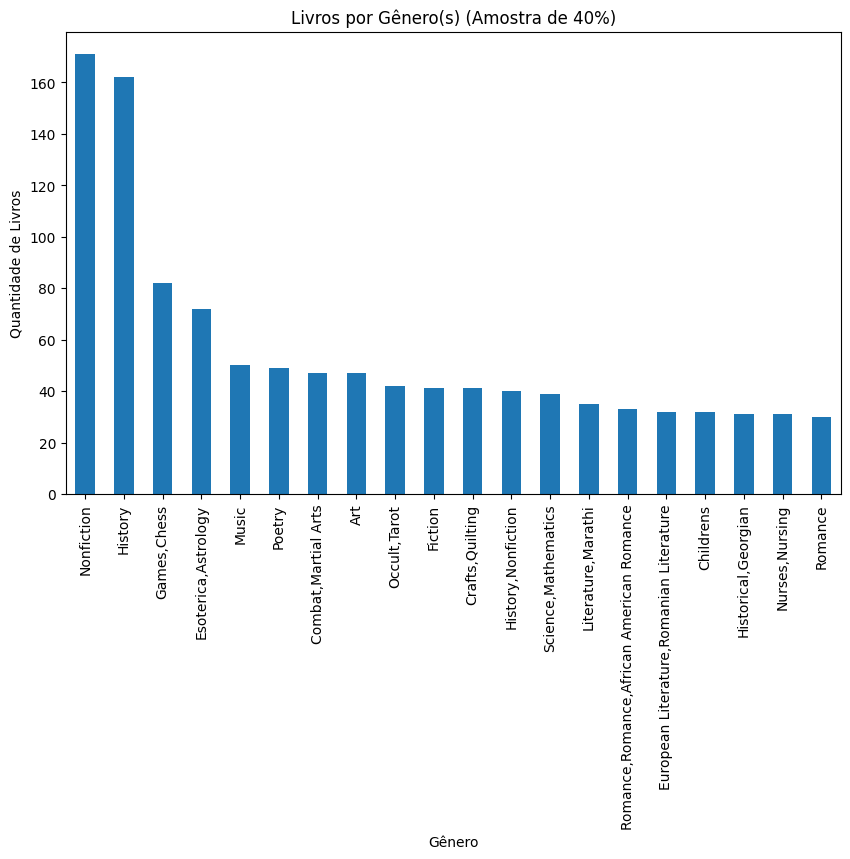

In [ ]:
#Gráfico de quantidade de livros por gênero usando a amostra
genre_counts = amostradf['genre'].value_counts().nlargest(20)

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Livros por Gênero(s) (Amostra de 40%)')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Livros')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.shape

(84054, 9)

# Visualizações Adicionais

### Detecção de Outliers pela EDA

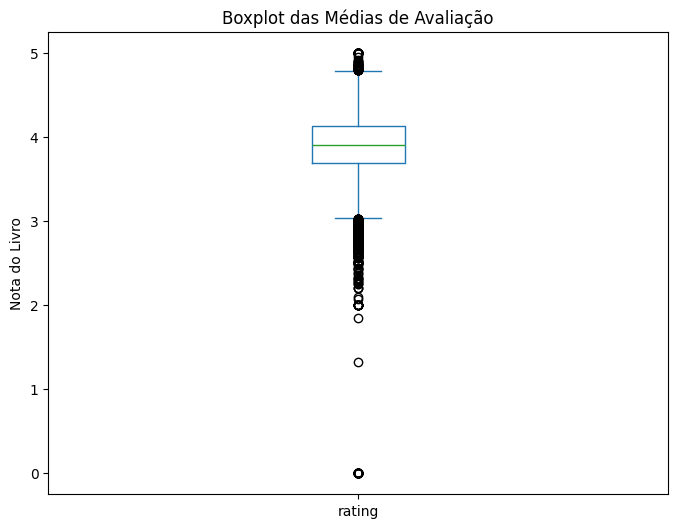

In [ ]:
# Boxplot das avaliações para identificar outliers
plt.figure(figsize=(8, 6))
amostradf['rating'].plot(kind='box')
plt.title('Boxplot das Médias de Avaliação')
plt.ylabel('Nota do Livro')
plt.show()

Com o plot de avaliações, é possível perceber que a maioria dos valores se encontram nos limites superior e inferior da box. E é notável a existência de outliers onde a média de avaliação do livro é 0.

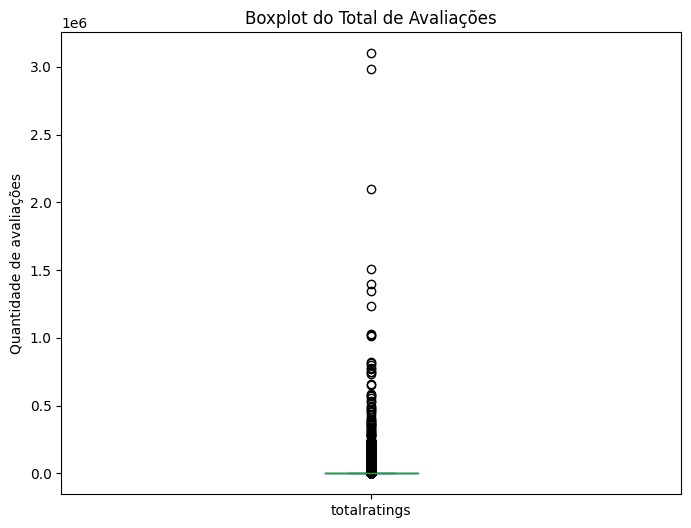

In [ ]:
# Boxplot das avaliações para identificar outliers
plt.figure(figsize=(8, 6))
amostradf['totalratings'].plot(kind='box')
plt.title('Boxplot do Total de Avaliações')
plt.ylabel('Quantidade de avaliações')
plt.show()

Para o número total de avaliações, livros com alta quantidade de avaliações por usuários são detectados como outliers, como consta no boxplot acima. Existe um livro com aprox. 100 mil avaliações.

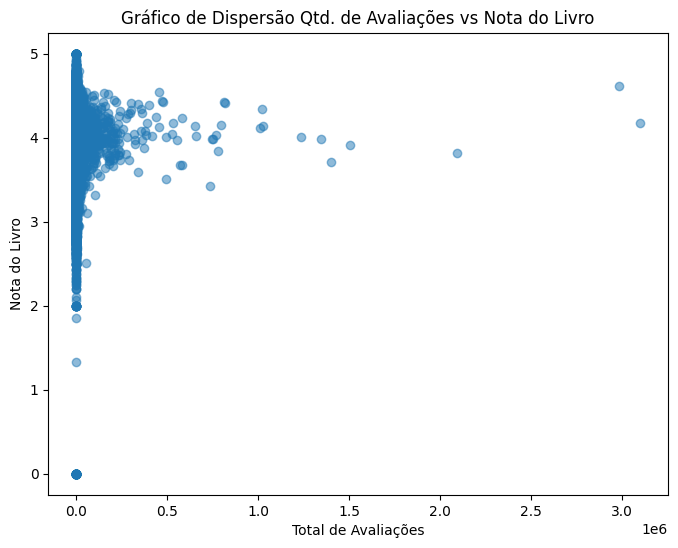

In [ ]:
# Gráfico de dispersão para totalratings e rating
plt.figure(figsize=(8, 6))
plt.scatter(amostradf['totalratings'], amostradf['rating'], alpha=0.5)
plt.title('Gráfico de Dispersão Qtd. de Avaliações vs Nota do Livro')
plt.xlabel('Total de Avaliações')
plt.ylabel('Nota do Livro')
plt.show()

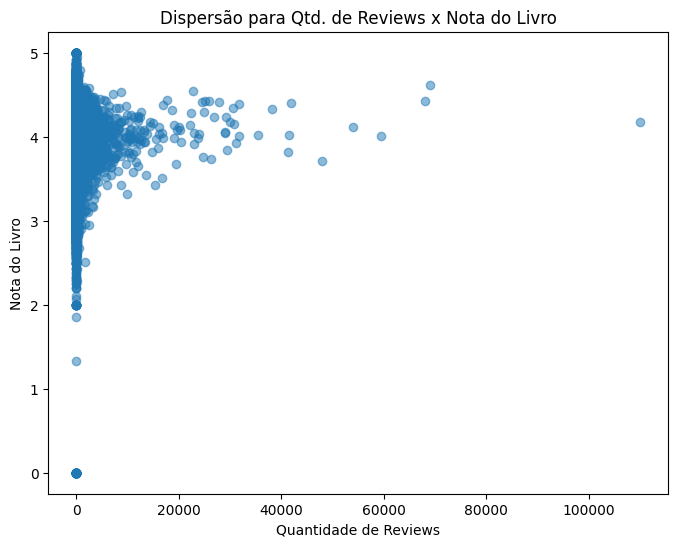

In [ ]:
# Gráfico de dispersão para reviews e rating
plt.figure(figsize=(8, 6))
plt.scatter(amostradf['reviews'], amostradf['rating'], alpha=0.5)
plt.title('Dispersão para Qtd. de Reviews x Nota do Livro')
plt.xlabel('Quantidade de Reviews')
plt.ylabel('Nota do Livro')
plt.show()

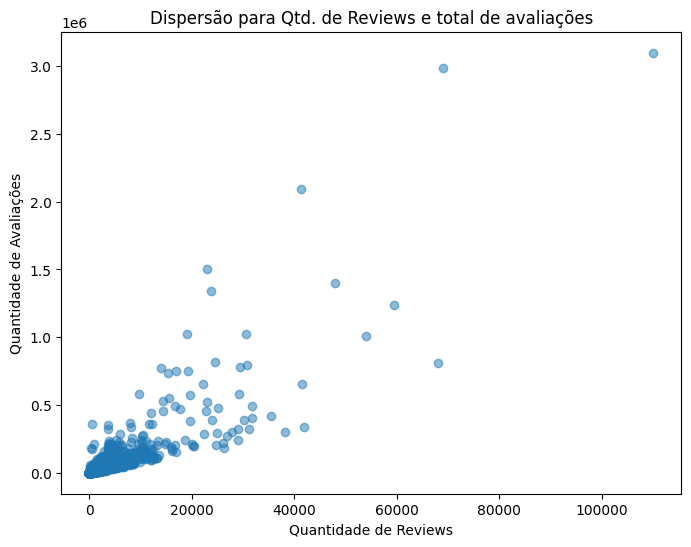

In [ ]:
# Gráfico de dispersão para reviews e totalratings
plt.figure(figsize=(8, 6))
plt.scatter(amostradf['reviews'], amostradf['totalratings'], alpha=0.5)
plt.title('Dispersão para Qtd. de Reviews e total de avaliações')
plt.xlabel('Quantidade de Reviews')
plt.ylabel('Quantidade de Avaliações')
plt.show()